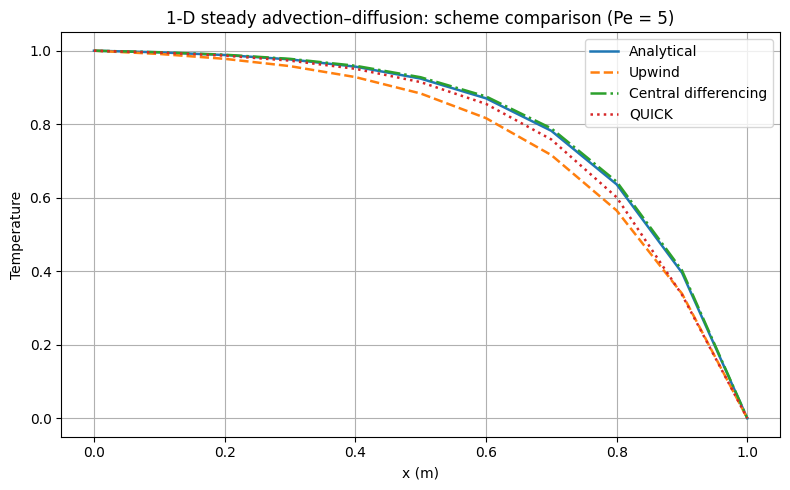

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# physical parameters
# -------------------------------------------------------
u   = 0.5          # velocity  (m s-1)
D   = 0.1          # diffusion coefficient (m² s-1)
L   = 1.0          # domain length (m)

# -------------------------------------------------------
# numerical parameters
# -------------------------------------------------------
dx   = 0.1                       # grid spacing (m)
nx   = int(L/dx) + 1             # number of cell centres
x    = np.linspace(0.0, L, nx)   # coordinates
dt   = 0.02   # time step (s)    
n_it = 20000   # iterations  

T_left  = 1.0                    # Dirichlet BC at x = 0
T_right = 0.0                    # Dirichlet BC at x = L

# -------------------------------------------------------
# analytical steady-state solution
# -------------------------------------------------------
Pe     = u*L/D
T_exact = 1.0 - (np.exp(Pe*x/L) - 1.0)/(np.exp(Pe) - 1.0)

# -------------------------------------------------------
# helper: face value according to scheme
# -------------------------------------------------------
def faces(T, i, scheme):
    if scheme == 'upwind':  # first-order upwind
        Tw = T[i-1]
        Te = T[i]
    elif scheme == 'central':   # central differencing
        Tw = 0.5*(T[i-1] + T[i])
        Te = 0.5*(T[i]   + T[i+1])
    else:   # QUICK   (positive flow)
        Tw = (3.0*T[i-1] + 6.0*T[i]   - T[i+1]) / 8.0
        if i + 2 < len(T):
            Te = (3.0*T[i]   + 6.0*T[i+1] - T[i+2]) / 8.0
        else:   # fallback near the outlet
            Te = T[i]
    return Tw, Te

# -------------------------------------------------------
# explicit time-marching solver
# -------------------------------------------------------
def solve(scheme):
    T = np.linspace(T_left, T_right, nx)   
    T[0]  = T_left
    T[-1] = T_right

    for _ in range(n_it):
        Told = T.copy()
        for i in range(1, nx-1):
            Tw, Te = faces(Told, i, scheme)
            conv   = -u * (Te - Tw) / dx
            diff=D*(Told[i+1] - 2.0*Told[i]+Told[i-1])/dx**2
            T[i]  += dt * (diff + conv)

    return T

T_upwind  = solve('upwind')
T_central = solve('central')
T_quick   = solve('quick')

# -------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(x, T_exact, label='Analytical', linewidth=1.8)
plt.plot(x, T_upwind, '--', label='Upwind', linewidth=1.8)
plt.plot(x, T_central, '-.', label='Central differencing', linewidth=1.8)
plt.plot(x, T_quick, ':', label='QUICK', linewidth=1.8)

plt.title('1-D steady advection–diffusion: scheme comparison (Pe = 5)')
plt.xlabel('x (m)')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()